Text(0,0.5,'loss')

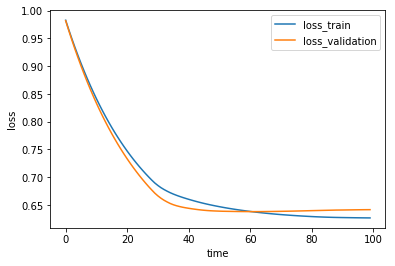

In [10]:
%matplotlib inline
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
X,y= load_svmlight_file("H:\\datasets\\australian_scale.txt")
X = X.toarray()
row = X.shape[0]
A = np.ones([row,])
X = np.c_[X,A]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train_test_split(y, shuffle=False)
R =X_train.shape[0]
namda = 0
M = np.zeros(15,)
learning_rate = 0.02
G = 0
T = 100
L_train = np.zeros([T])
L_validation = np.zeros([T])
#取阈值
value=0.2
for n in range(T):
    #梯度初始化
    g = 0
    for i in range(R):
        #对训练集所有样本求梯度
        if 1-y_train[i]*(M.T.dot(X_train[i])) >= 0:
            g = g + M - X_train[i]*y_train[i]
        else:
            g = g + M
    #取平均值
    g = g/R
    #更新模型参数
    M = M - learning_rate*g
    r = 0
    #命中数
    hit = 0
    for i in range(R):
        r = r + max(0,1-y_train[i]*M.T.dot(X_train[i]))
        if (M.dot(X_train[i]) >= value and y_train[i] == 1) or (M.dot(X_train[i]) < value and y_train[i] == -1):
            hit += 1
    #训练集准确率
    accuracy_train = hit/R
    #计算训练集loss
    L_train[n] = 0.5*M.T.dot(M) + 1/R*r
    r = 0
    #命中数
    hit = 0
    for i in range(row-R):
        r = r + max(0,1-y_test[i]*M.T.dot(X_test[i]))
        if (M.dot(X_test[i]) >= value and y_test[i] == 1) or (M.dot(X_test[i]) < value and y_test[i] == -1):
            hit += 1
    #测试集准确率
    accuracy_test = hit/(row-R)
    #计算验证集loss
    L_validation[n] = 0.5*M.T.dot(M) + 1/(row-R)*r

n = np.arange(T)
plt.plot(n,L_train[n],label='loss_train')
plt.plot(n,L_validation[n],label='loss_validation')
plt.legend(loc='upper right')
plt.xlabel('time')
plt.ylabel('loss')
